In [1]:
from pandas_datareader import data

In [3]:
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,2.591785,2.390042,2.490664,2.499133,897427216.0,2.499133
2004-08-20,2.716817,2.503118,2.515820,2.697639,458857488.0,2.697639
2004-08-23,2.826406,2.716070,2.758411,2.724787,366857939.0,2.724787
2004-08-24,2.779581,2.579581,2.770615,2.611960,306396159.0,2.611960
2004-08-25,2.689918,2.587302,2.614201,2.640104,184645512.0,2.640104


In [4]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-24,37.567501,37.331001,37.477501,37.419998,10544000.0,37.419998
2015-12-28,38.149502,37.476002,37.646000,38.125500,30306000.0,38.125500
2015-12-29,38.999001,38.321499,38.334499,38.830002,35300000.0,38.830002
2015-12-30,38.880001,38.345001,38.830002,38.549999,25866000.0,38.549999
2015-12-31,38.474998,37.917000,38.474998,37.944000,30018000.0,37.944000


In [5]:
goog = goog['Close']

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='Date'>

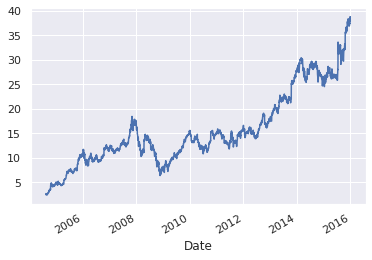

In [7]:
goog.plot()

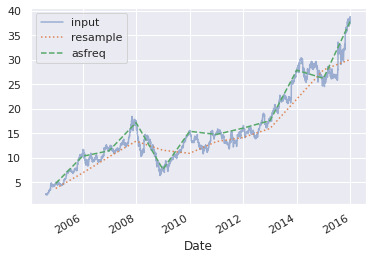

In [8]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input','resample','asfreq'], loc='upper left')
plt.show()

In [9]:
import pandas as pd
import numpy as np

/tmp/ipykernel_9964/2028928686.py:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


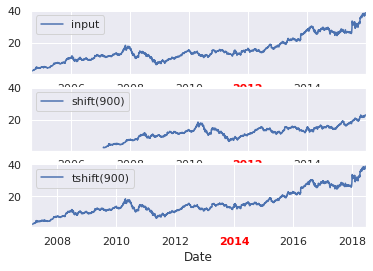

In [10]:
fig, ax = plt.subplots(3, sharey=True)

goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

local_max = pd.to_datetime('2017-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[4].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

/tmp/ipykernel_9964/2573961513.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


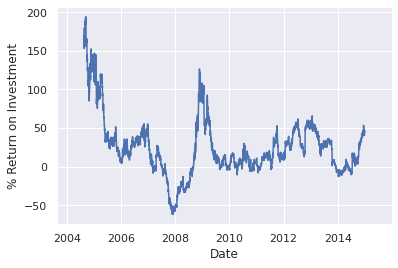

In [11]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel("% Return on Investment")
plt.show()

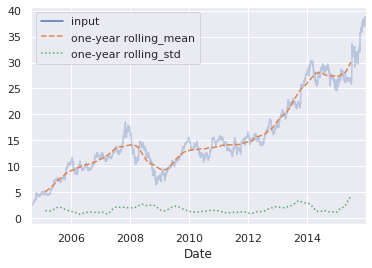

In [12]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)